In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
from astropy import units as u
from gammapy.analysis import Analysis, AnalysisConfig

In [22]:
import os
os.environ['GAMMAPY_DATA'] = './gammapy-data/1.0.1'

! echo $GAMMAPY_DATA

./gammapy-data/1.0.1


In [3]:
config = AnalysisConfig()

In [25]:
config.observations.datastore = '$GAMMAPY_DATA/hess-dl3-dr1'

In [6]:
config.observations.obs_cone = {'frame': 'icrs', 'lon': '83.633 deg', 'lat': '22.014 deg', 'radius': '5 deg'}

In [26]:
config.datasets.type = '3d'

config.datasets.stack = True

config.datasets.geom.wcs.skydir = {'frame': 'icrs', 'lon': '83.633 deg', 'lat': '22.014 deg'}
config.datasets.geom.wcs.width = {'width': '2 deg', 'height': '2 deg'}
config.datasets.geom.wcs.binsize = '0.02 deg'

config.datasets.geom.axes.energy = {'min': '1 TeV', 'max': '10 TeV', 'nbins': '10'}
config.datasets.geom.axes.energy_true = {'min': '0.5 TeV', 'max': '20 TeV', 'nbins': '20'}

config.datasets.background.method = 'fov_background'
config.datasets.background.parameters = {'method': 'scale'}
config.datasets.background.exclusion = '$GAMMAPY_DATA/joint-crab/exclusion/exclusion_mask_crab.fits.gz'

In [16]:
config.fit.fit_range = {'min': '1 TeV', 'max': '10 TeV'}
config.flux_points.energy = {'min': '1 TeV', 'max': '10 TeV', 'nbins': '4'}

In [17]:
config.excess_map.correlation_radius = '0.1 deg'

In [18]:
analysis = Analysis(config)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [27]:
analysis.get_observations()

Fetching observations.
Observations selected: 4 out of 4.
Number of selected observations: 4


In [28]:
analysis.observations.ids

['23523', '23526', '23559', '23592']

In [30]:
analysis.get_datasets()

Creating reference dataset and makers.
Creating the background Maker.
Start the data reduction loop.
Computing dataset for observation 23523
Running MapDatasetMaker
Running SafeMaskMaker
Running FoVBackgroundMaker
Computing dataset for observation 23526
Running MapDatasetMaker
Running SafeMaskMaker
Running FoVBackgroundMaker
Computing dataset for observation 23559
Running MapDatasetMaker
Running SafeMaskMaker
Running FoVBackgroundMaker
Computing dataset for observation 23592
Running MapDatasetMaker
Running SafeMaskMaker
Running FoVBackgroundMaker


In [35]:
print(analysis.datasets['stacked'])

MapDataset
----------

  Name                            : stacked 

  Total counts                    : 2485 
  Total background counts         : 1997.49
  Total excess counts             : 487.51

  Predicted counts                : 1997.49
  Predicted background counts     : 1997.49
  Predicted excess counts         : nan

  Exposure min                    : 2.73e+08 m2 s
  Exposure max                    : 3.52e+09 m2 s

  Number of total bins            : 100000 
  Number of fit bins              : 100000 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0




In [36]:
analysis.datasets['stacked'].counts.smooth(0.05 * u.deg).plot_interactive()

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

In [38]:
analysis.get_excess_map()

Computing excess maps.


<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

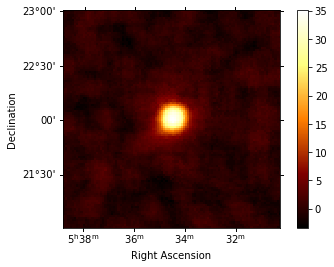

In [40]:
analysis.excess_map['sqrt_ts'].plot(add_cbar=True)

In [41]:
model_config = """
components:
- name: crab
  type: SkyModel
  spatial:
    type: PointSpatialModel
    frame: icrs
    parameters:
    - name: lon_0
      value: 83.63
      unit: deg
    - name: lat_0
      value: 22.014
      unit: deg
  spectral:
    type: PowerLawSpectralModel
    parameters:
    - name: amplitude
      value: 1.0e-12
      unit: cm-2 s-1 TeV-1
    - name: index
      value: 2.0
      unit: ''
    - name: reference
      value: 1.0
      unit: TeV
      frozen: true
"""

In [42]:
analysis.set_models(model_config)

Reading model.
Models

Component 0: SkyModel

  Name                      : crab
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.000   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         
    lon_0                         :     83.630   +/-    0.00 deg         
    lat_0                         :     22.014   +/-    0.00 deg         

Component 1: FoVBackgroundModel

  Name                      : stacked-bkg
  Datasets names            : ['stacked']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000

In [43]:
analysis.run_fit()

Fitting datasets.
OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 263
	total stat : 19991.99

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [47]:
analysis.config.flux_points.source = 'crab'
analysis.config.flux_points.energy.nbins = '5'
analysis.config.flux_points.parameters = {'selection_optional': 'all', 'n_sigma': 2, 'n_sigma_ul': 3}

In [48]:
analysis.get_flux_points()

Calculating flux points.
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend
Reoptimize = False ignored for iminuit backend

      e_ref                 dnde          ...      sqrt_ts      
       TeV            1 / (cm2 s TeV)     ...                   
------------------ ---------------------- ... ------------------
1.2589254117941673 2.3566087662331868e-11 ... 24.265132633549012
1.9952623149688797  8.856743586316166e-12 ... 22.402060900264843
3.1622776601683795 2.4889094288417994e-12 ... 16.767165542343378
 5.011872336272723  6.151509065679832e-13 ... 11.905985481025379
 7.943282347242818 2.4384526999956023e-13 ...  8.

In [49]:
analysis.flux_points.data.sqrt_ts_threshold_ul = 5

(<AxesSubplot:xlabel='Energy [TeV]', ylabel='e2dnde [erg / (cm2 s)]'>,
 <AxesSubplot:xlabel='Energy [TeV]', ylabel='Residuals\n (data - model) / model'>)

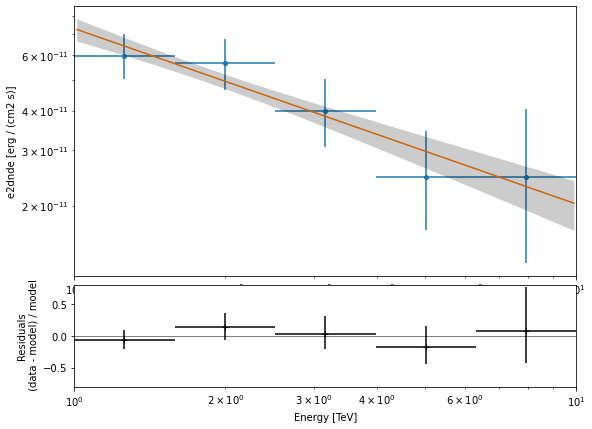

In [51]:
analysis.flux_points.plot_fit()

In [52]:
analysis.get_excess_map()

Computing excess maps.


<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

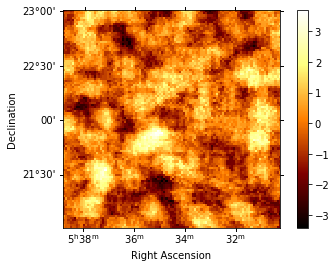

In [53]:
analysis.excess_map['sqrt_ts'].plot(add_cbar=True)

<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

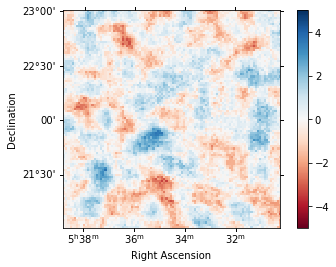

In [54]:
analysis.excess_map['sqrt_ts'].plot(add_cbar=True, cmap='RdBu', vmin=-5, vmax=5)

In [55]:
from astropy.coordinates import SkyCoord
from regions import CircleSkyRegion

import matplotlib.pyplot as plt
import gammapy as gp

In [56]:
data_store = gp.data.DataStore.from_dir('$GAMMAPY_DATA/hess-dl3-dr1')

In [60]:
selection = {'type': 'sky_circle', 'frame': 'icrs', 'lon': 83.633 * u.deg, 'lat': 22.014 * u.deg, 'radius': 5 * u.deg}

In [61]:
selected_obs_table = data_store.obs_table.select_observations(selection)

In [75]:
observations = data_store.get_observations(selected_obs_table['OBS_ID'])

Observations selected: 4 out of 4.


In [67]:
energy_axis = gp.maps.MapAxis.from_energy_bounds(1.0, 10.0, 4, unit='TeV')
energy_axis_true = gp.maps.MapAxis.from_energy_bounds(0.5, 20.0, 10, unit='TeV', name='energy_true')

In [68]:
geom = gp.maps.WcsGeom.create(skydir=(83.633, 22.014), binsz=0.02, width=(2, 2), frame='icrs', proj='CAR', 
                              axes=[energy_axis])

In [69]:
stacked = gp.datasets.MapDataset.create(geom=geom, energy_axis_true=energy_axis_true, name='crab_stacked')

In [70]:
offset_max = 2.5 * u.deg

In [72]:
maker = gp.makers.MapDatasetMaker()
maker_safe_mask = gp.makers.SafeMaskMaker(methods=['offset-max', 'aeff-max'], offset_max=offset_max)

In [74]:
circle = CircleSkyRegion(center=SkyCoord('83.63 deg', '22.01 deg'), radius=0.2 * u.deg)
exclusion_mask = ~geom.region_mask(regions=[circle])
maker_fov = gp.makers.FoVBackgroundMaker(method='fit', exclusion_mask=exclusion_mask)

In [79]:
for obs in observations:
    
    cutout = stacked.cutout(obs.pointing_radec, width=2 * offset_max, name=f'obs-{obs.obs_id}')
    
    dataset = maker.run(cutout, obs)
    dataset = maker_safe_mask.run(dataset, obs)
    dataset = maker_fov.run(dataset)
    
    stacked.stack(dataset)

<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

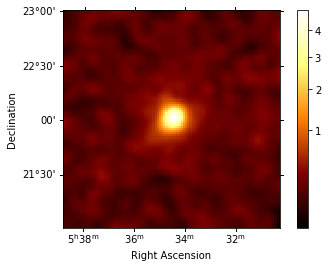

In [80]:
stacked.counts.sum_over_axes().smooth(0.05 * u.deg).plot(stretch='sqrt', add_cbar=True)

In [82]:
target_position = SkyCoord(ra=83.63308, dec=22.01450, unit='deg')

spatial_model = gp.modeling.models.PointSpatialModel(lon_0=target_position.ra, lat_0=target_position.dec, 
                                                     frame='icrs')

spectral_model = gp.modeling.models.PowerLawSpectralModel(index=2.702, amplitude=4.712e-11 * u.cm ** -2 / u.s / u.TeV,
                                                          reference=1 * u.TeV)

sky_model = gp.modeling.models.SkyModel(spatial_model=spatial_model, spectral_model=spectral_model, name='crab')

bkg_model = gp.modeling.models.FoVBackgroundModel(dataset_name='crab-stacked')

In [85]:
stacked.models = [sky_model, bkg_model]

In [86]:
fit = gp.modeling.Fit(optimize_opts={"print_level": 1})
result = fit.run([stacked])

In [87]:
print(result)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 109
	total stat : 16245.04

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [89]:
print(stacked.models.to_parameters_table())

model   type      name     value    ...    max    frozen is_norm link
----- -------- --------- ---------- ... --------- ------ ------- ----
 crab spectral     index 2.6022e+00 ...       nan  False   False     
 crab spectral amplitude 4.5308e-11 ...       nan  False    True     
 crab spectral reference 1.0000e+00 ...       nan   True   False     
 crab  spatial     lon_0 8.3619e+01 ...       nan  False   False     
 crab  spatial     lat_0 2.2024e+01 ... 9.000e+01  False   False     


<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

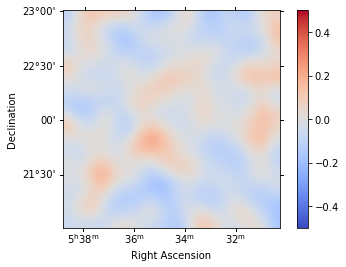

In [90]:
stacked.plot_residuals_spatial(method='diff/sqrt(model)', vmin=-0.5, vmax=0.5)

(<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>,
 <AxesSubplot:xlabel='Energy [TeV]', ylabel='Residuals (data - model)'>)

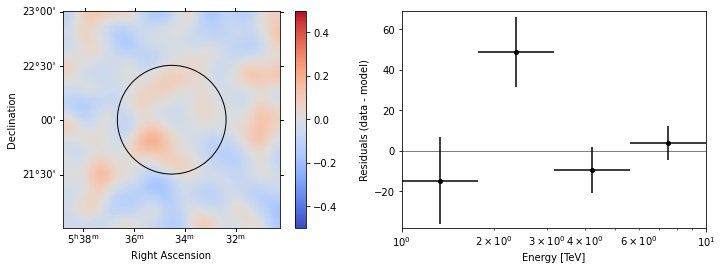

In [91]:
region = CircleSkyRegion(center=SkyCoord('83.63 deg', '22.01 deg'), radius=0.5 * u.deg)

stacked.plot_residuals(kwargs_spatial={'method': 'diff/sqrt(model)', 'vmin': -0.5, 'vmax': 0.5},
                       kwargs_spectral={'region': region})

In [95]:
energy_bounds = [1, 10] * u.TeV

<AxesSubplot:xlabel='Energy [TeV]', ylabel='e2 * dnde [TeV / (cm2 s)]'>

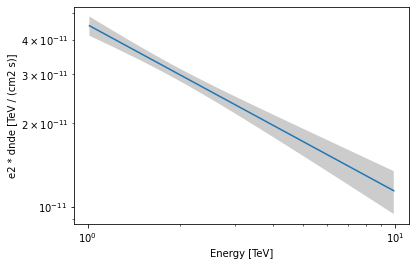

In [97]:
sky_model.spectral_model.plot(energy_bounds=energy_bounds, energy_power=2)
sky_model.spectral_model.plot_error(energy_bounds=energy_bounds, energy_power=2)

In [99]:
energy_edges = [1, 2, 4, 10] * u.TeV
fpe = gp.estimators.FluxPointsEstimator(energy_edges=energy_edges, source='crab')

<AxesSubplot:xlabel='Energy [TeV]', ylabel='dnde [TeV / (cm2 s)]'>

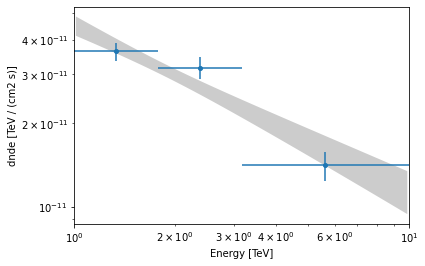

In [100]:
ax = sky_model.spectral_model.plot_error(energy_bounds=energy_bounds, energy_power=2)
fpe.run(datasets=[stacked]).plot(ax=ax, energy_power=2)